In [17]:
# 이미지 데이터 로딩
from tensorflow.keras.datasets import mnist # module.load_data()
(train_image,train_labels),(test_image,test_labels)=mnist.load_data()

In [18]:
# 학습 데이터 구조 확인
train_image.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [19]:
# 첫번째 이미지
print(train_labels[0]) # 첫번째이미지의 답 : 5
train_image[0] # 5라는 숫자 이미지

5


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [20]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [21]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [22]:
test_image.shape

(10000, 28, 28)

In [23]:
# 학습 데이터 준비(60000,28,28)3차원  : 28X28 2차원인데 => 1차원 변경
train_image=train_image.reshape((60000,28*28))
# 0 ~ 1 사이값으로 변환
train_image=train_image.astype('float32')/255

# 테스트 데이터 동일 처리
test_image=test_image.reshape((10000,28*28))
test_image=test_image.astype('float32')/255

In [24]:
# 학습 진행
model.fit(
      train_image       # 학습데이터
    , train_labels      # 학습데이터 답
    , epochs=5          # 전체데이터에 대한 반복 학습 횟수
    , batch_size=128    # 한번 학습(미분)시 사용할 데이터 포인트 개수
)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2554 - accuracy: 0.9253
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1044 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0691 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0492 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0372 - accuracy: 0.9886


In [25]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2537 - accuracy: 0.9262
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1035 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0687 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0506 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0375 - accuracy: 0.9888


In [26]:
# 검증
# 테스트 이미지 10개 가지고 와서 
test_digits=test_image[:10]
# 모델에 집어넣어서 예측값(10개) , 한개의 예측값에는 10개 출력
predictions=model.predict(test_digits)
print(predictions[0]) # 10 개 결과 출력 
# => argmax
print(predictions[0].argmax()) # 최대값을 가지고 있는 인덱스 반환
print(predictions[0][7])
# 테스트 데이터 첫번째 이미지의 진짜답
print(f'테스트 데이터 첫번째 이미지의 답 : {test_labels[0]}')

# 테스트 이미지 원래답 10개와 비교


1/1 [==============================] - 0s 50ms/step
[2.1027904e-09 9.6999240e-12 1.7201729e-06 2.7506276e-06 6.8184222e-13
 3.9182328e-09 8.0415995e-15 9.9999511e-01 3.2248355e-08 3.1489111e-07]
7
0.9999951
테스트 데이터 첫번째 이미지의 답 : 7


In [27]:
test_loss, test_acc=model.evaluate(test_image, test_labels) # 테스트이미지(10000개), 답
print(f'테스트 이미지에 대한 모델 정확도 : {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0637 - accuracy: 0.9803
테스트 이미지에 대한 모델 정확도 : 0.9803000092506409


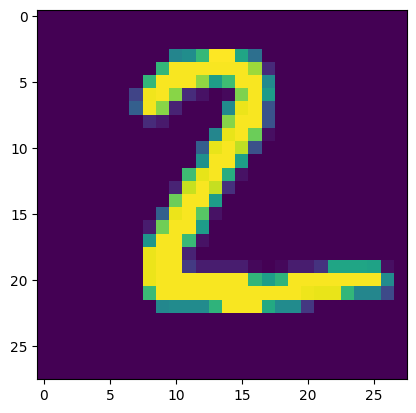

In [28]:
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(test_images[1])
plt.show()

313/313 [==============================] - 1s 2ms/step
테스트이미지 예측값 : 5
원래답 : 5


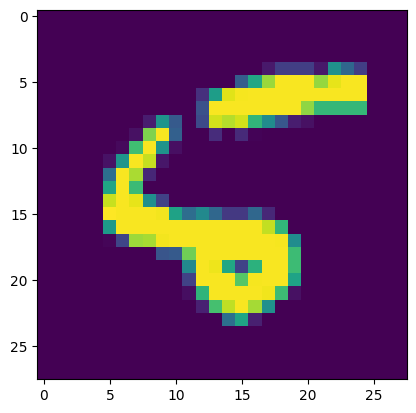

In [29]:
predictions=model.predict(test_image)
idx=8
print(f'테스트이미지 예측값 : {predictions[idx].argmax()}')
print(f'원래답 : {test_labels[idx]}')
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(test_images[idx])
plt.show()


In [30]:
# 예측값 == 원래값 => boolean
import pandas as pd
predictions=model.predict(test_images).argmax(axis=1)
predictions

ValueError: in user code:

    File "c:\ProgramData\anaconda3\envs\dl-dev\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\ProgramData\anaconda3\envs\dl-dev\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\ProgramData\anaconda3\envs\dl-dev\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\ProgramData\anaconda3\envs\dl-dev\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\ProgramData\anaconda3\envs\dl-dev\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\ProgramData\anaconda3\envs\dl-dev\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_3" "                 f"(type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 784, but received input with shape (None, 28, 28)
    
    Call arguments received by layer "sequential_3" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 28, 28), dtype=uint8)
      • training=False
      • mask=None


In [31]:

# 예측값 == 원래값 => boolean
import pandas as pd
predictions=model.predict(test_images).argmax(axis=1)
# 결과 저장 데이터프레임 생성
result_df=pd.DataFrame({
    '예측값':predictions 
    ,'원래값':test_labels
})
result_df['bool']=result_df['예측값']==result_df['원래값']
false_labels_indexs=result_df[result_df['bool']==False].index

for idx in false_labels_indexs[-5:]: # 뒤에서 5개 출력
    print(f'원래답 : {test_labels[idx]}')
    print(f'예측값 : {predictions[idx]}')
    plt.imshow(test_images[idx].reshape((28,28)))
    plt.show()


ValueError: in user code:

    File "c:\ProgramData\anaconda3\envs\dl-dev\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\ProgramData\anaconda3\envs\dl-dev\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\ProgramData\anaconda3\envs\dl-dev\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\ProgramData\anaconda3\envs\dl-dev\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\ProgramData\anaconda3\envs\dl-dev\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\ProgramData\anaconda3\envs\dl-dev\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_3" "                 f"(type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 784, but received input with shape (None, 28, 28)
    
    Call arguments received by layer "sequential_3" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 28, 28), dtype=uint8)
      • training=False
      • mask=None


In [32]:
result_df['bool']=result_df['예측값']==result_df['원래값']
result_df.head()

NameError: name 'result_df' is not defined

In [33]:
false_labels_indexs=result_df[result_df['bool']==False].index
false_labels_indexs[:10]

NameError: name 'result_df' is not defined

In [34]:
for idx in false_labels_indexs[:5]:
    print(f'원래답 : {test_labels[idx]}')
    print(f'예측값 : {predictions[idx]}')
    plt.imshow(test_images[idx].reshape((28,28)))
    plt.show()

NameError: name 'false_labels_indexs' is not defined

### NEXT

In [35]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [36]:
# 학습 이미지의 차원 확인
train_images.ndim, train_images.shape

(3, (60000, 28, 28))

In [37]:
train_images.dtype

dtype('uint8')

In [38]:
import matplotlib.pyplot as plt
digit = train_images[4]
digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

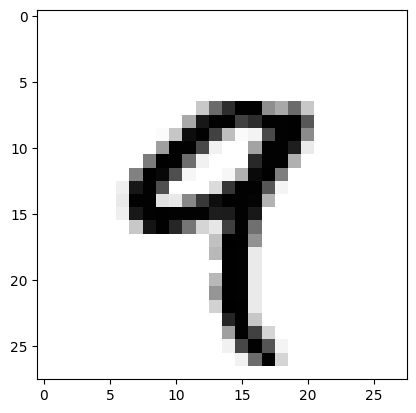

In [39]:
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [40]:
train_labels[4] # 답

9

In [41]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [42]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

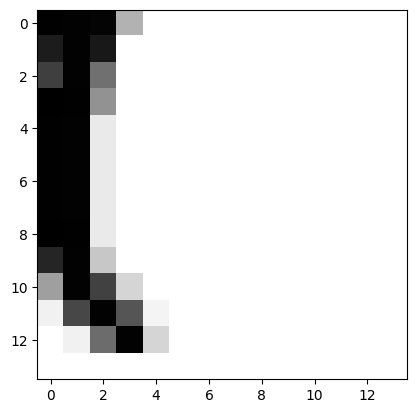

In [43]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape
plt.imshow(my_slice[4], cmap=plt.cm.binary)
plt.show()

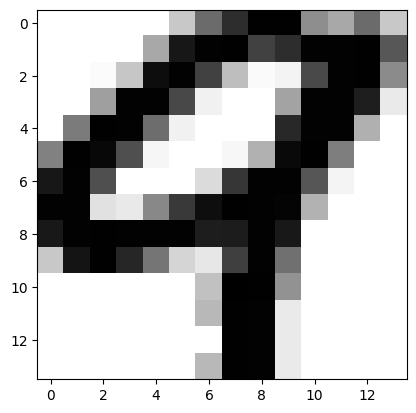

In [44]:
my_slice = train_images[4, 7:-7, 7:-7]
plt.imshow(my_slice, cmap=plt.cm.binary)
plt.show()

In [45]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [46]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [47]:
import time
import numpy as np

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time() # 연산 시작 시간 저장
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.) # relu
print("걸린 시간: {0:.6f} s".format(time.time() - t0)) # 걸린 시간 출력

걸린 시간: 0.004995 s


In [48]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("걸린 시간: {0:.6f} s".format(time.time() - t0))

걸린 시간: 1.600395 s


### NEXT2

In [52]:
import tensorflow as tf

x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [54]:
x = tf.Variable(tf.zeros((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [55]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.64177895, 0.64177895],
        [0.9677181 , 0.9677181 ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

In [56]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [64]:
# NN 생성 = 계산그래프
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ]
)
model.compile(
    optimizer = 'rmsprop',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# 데이터 정규화
train_images = train_images.reshape(60000, 28 * 28)
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape(10000, 28 * 28)
test_images = test_images.astype('float32') / 255

model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=128
)
model.summary()

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 2.3017 - accuracy: 0.1115
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 2.3015 - accuracy: 0.1124
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 2.3013 - accuracy: 0.1124
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dense_21 (Dense)            (None, 512)               262656    
                                                                 
 dense_22 (Dense)            (None, 512)               262656    
                     

In [65]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

In [66]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [67]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

In [68]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

In [69]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [70]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [71]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"에포크 {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실: {loss:.2f}")

In [72]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

에포크 0
0번째 배치 손실: 5.28
100번째 배치 손실: 2.24
200번째 배치 손실: 2.21
300번째 배치 손실: 2.09
400번째 배치 손실: 2.23
에포크 1
0번째 배치 손실: 1.91
100번째 배치 손실: 1.88
200번째 배치 손실: 1.84
300번째 배치 손실: 1.73
400번째 배치 손실: 1.85
에포크 2
0번째 배치 손실: 1.59
100번째 배치 손실: 1.58
200번째 배치 손실: 1.51
300번째 배치 손실: 1.44
400번째 배치 손실: 1.53
에포크 3
0번째 배치 손실: 1.33
100번째 배치 손실: 1.34
200번째 배치 손실: 1.25
300번째 배치 손실: 1.22
400번째 배치 손실: 1.29
에포크 4
0번째 배치 손실: 1.13
100번째 배치 손실: 1.15
200번째 배치 손실: 1.05
300번째 배치 손실: 1.05
400번째 배치 손실: 1.12
에포크 5
0번째 배치 손실: 0.98
100번째 배치 손실: 1.01
200번째 배치 손실: 0.91
300번째 배치 손실: 0.93
400번째 배치 손실: 1.00
에포크 6
0번째 배치 손실: 0.87
100번째 배치 손실: 0.90
200번째 배치 손실: 0.81
300번째 배치 손실: 0.84
400번째 배치 손실: 0.91
에포크 7
0번째 배치 손실: 0.79
100번째 배치 손실: 0.82
200번째 배치 손실: 0.73
300번째 배치 손실: 0.77
400번째 배치 손실: 0.84
에포크 8
0번째 배치 손실: 0.73
100번째 배치 손실: 0.75
200번째 배치 손실: 0.67
300번째 배치 손실: 0.71
400번째 배치 손실: 0.78
에포크 9
0번째 배치 손실: 0.68
100번째 배치 손실: 0.69
200번째 배치 손실: 0.62
300번째 배치 손실: 0.67
400번째 배치 손실: 0.74


In [75]:
# 모델 평가
import numpy as np
predictions = model(test_images) # tf.Variable object
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"정확도: {matches.mean():.6f}")

정확도: 0.820600
